### Customers Segmentation

<img src="Task6.png">

Marketing is crucial for the growth and sustainability of a any business. Marketers can help build the company's brand, engage customers, grow revenue, and increase sales. One of the key pain points for marketers is to know their customers and identify their needs. By understanding the customer, marketers can launch a targeted marketing campaign that is tailored for specific needs.

In this project, a targeted ad marketing campaign will be done by dividing the customers into at least 3 distinctive groups.

### Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

### Loading the Dataset

In [4]:
df = pd.read_csv('Marketing_data.csv')
pd.set_option('display.max_columns', None)
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [8]:
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

##### Checking for Duplicates

In [9]:
df.duplicated().sum()

0

##### Checking for Null Values

In [10]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].replace(np.nan, np.mean(df['MINIMUM_PAYMENTS']))
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].replace(np.nan, np.mean(df['CREDIT_LIMIT']))

In [12]:
df.isna().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

##### Dropping unnecessary columns

In [13]:
df.drop(columns = ['CUST_ID'], axis = 1, inplace = True)
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


### Exploratory Data Analysis

In [14]:
n = len(df.columns)
n

17

In [15]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

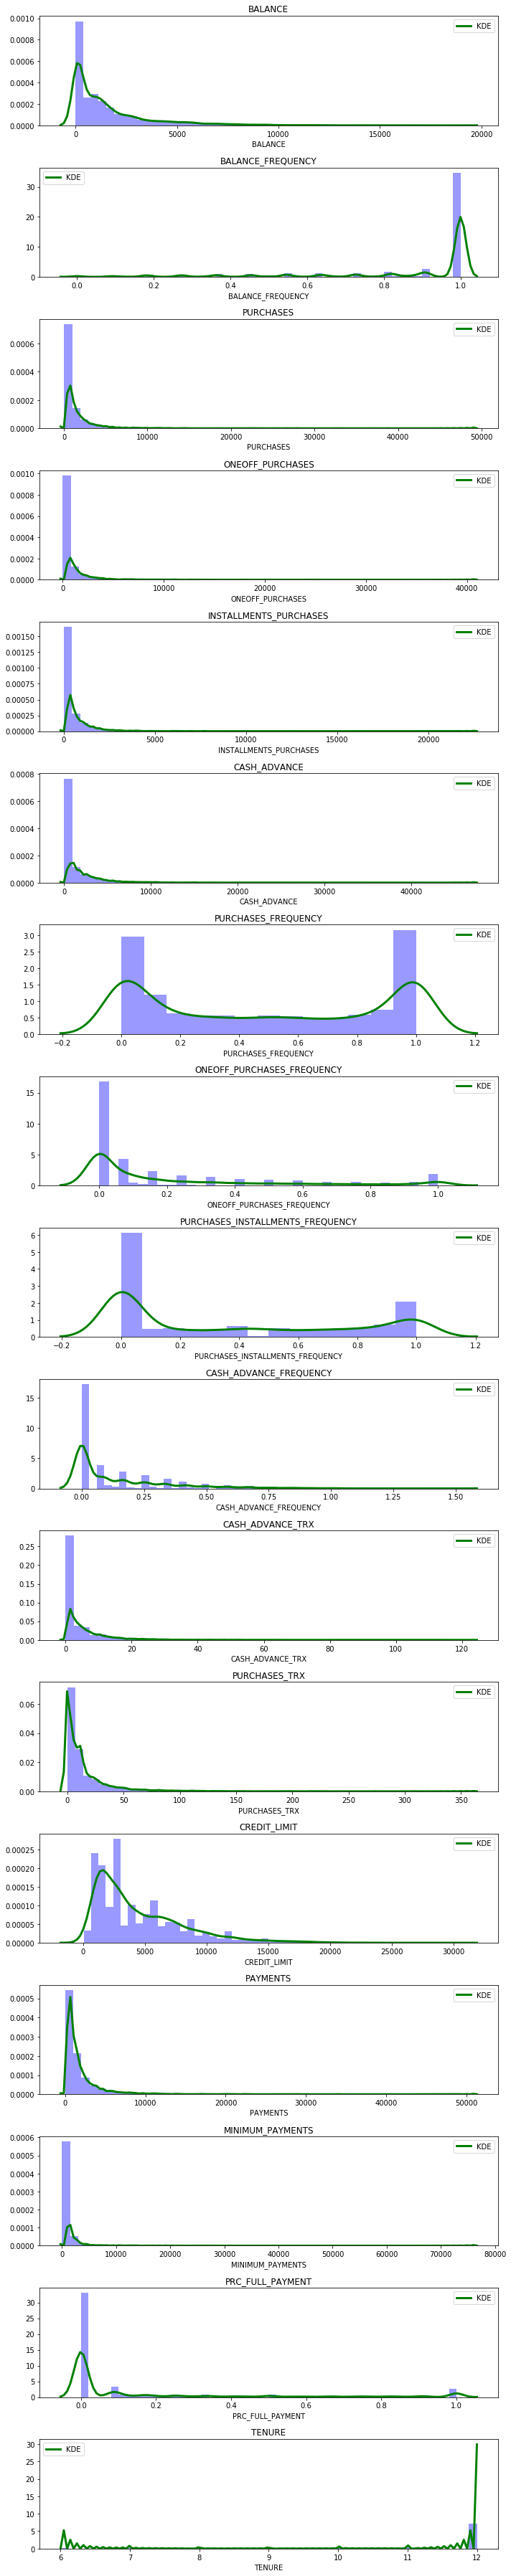

In [16]:
plt.figure(figsize = (10,50))

for i in range(n):
    plt.subplot(17, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {'color': 'g', 'lw':3, 'label':'KDE'}, hist_kws = {'color':'b'})
    plt.title(df.columns[i])
    
plt.tight_layout()

The mean of the balance is 1500. For the Purchases Frequency it is observed that there are two distinct group of customers.Most of the users does not do oneoff purchases and purchases installment. There's only a very small number of cutomers who pay their balance in full. The credit limit average is around 4500 and most customers are around 11 years tenure. 

(17.0, 0.0)

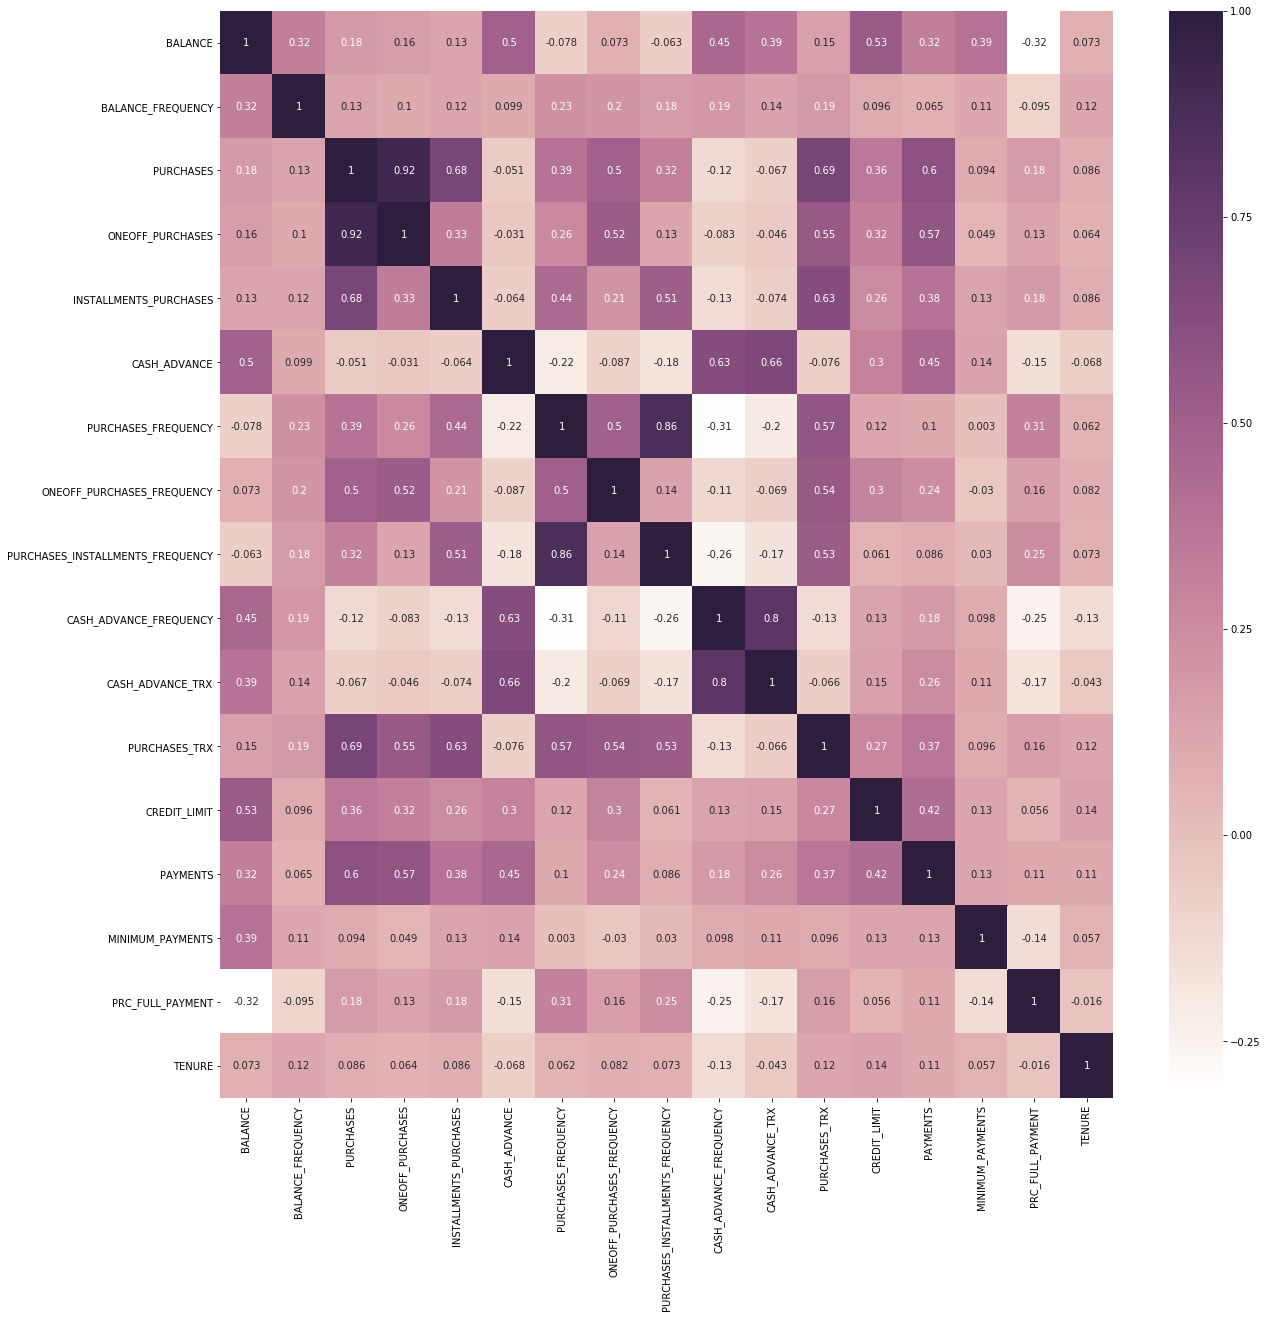

In [17]:
correlation = df.corr()

f, ax = plt.subplots(figsize = (20,20))
a = sns.heatmap(correlation, annot = True, cmap = sns.cubehelix_palette(light=1, as_cmap=True))
bottom, top = a.get_ylim()
a.set_ylim(bottom + 0.5, top - 0.5)

The Purchases has strong correlation to one off purchases, installment purchases, purchase transactions, credit limit and payments. There is aslo strong positive correlation between frequency of purchases and frequency of installment purchases.

### Data Preprocessing

In [18]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [19]:
df_scaled.shape

(8950, 17)

In [20]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

###### Finding the Optimal Number of Clusters

In [21]:
score_1 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    score_1.append(kmeans.inertia_)

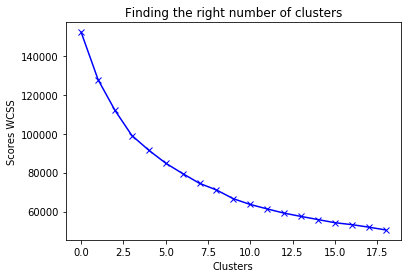

In [22]:
plt.plot(score_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.ylabel('Scores WCSS')
plt.xlabel('Clusters')
plt.show()

### Applying K-Means Model

In [23]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_

In [24]:
labels

array([5, 4, 0, ..., 3, 5, 5], dtype=int32)

In [27]:
kmeans.cluster_centers_.shape

(8, 17)

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.119101,0.395358,0.514961,0.638666,0.044133,-0.326488,0.953035,1.828035,0.177093,-0.400528,-0.322688,0.593181,0.419995,0.123029,-0.154788,0.393940,0.200206
1,1.012874,0.464529,2.497568,1.826892,2.549187,-0.156549,1.163655,1.581560,1.268730,-0.279918,-0.148303,3.100408,1.296208,1.448723,0.359745,0.261577,0.337784
2,1.109761,0.468337,-0.123906,-0.295655,0.249587,-0.034556,-0.096203,-0.557801,0.140950,-0.143235,-0.039176,0.037750,-0.105359,-0.119854,9.509958,-0.520275,0.291491
3,-0.399134,0.306267,-0.062098,-0.257131,0.325520,-0.359257,0.979441,-0.412494,1.173620,-0.460150,-0.356467,0.136056,-0.319701,-0.241624,-0.120576,0.362105,-0.026433
4,1.588326,0.375128,-0.228900,-0.161846,-0.243959,1.968207,-0.483746,-0.211832,-0.430624,1.923757,1.861930,-0.282023,0.972500,0.752332,0.348094,-0.390870,-0.093573
5,-0.015678,0.367331,-0.362880,-0.245857,-0.406258,-0.076059,-0.871497,-0.402065,-0.770210,0.147096,-0.019570,-0.490484,-0.341945,-0.267286,-0.073728,-0.454599,-0.015770
6,-0.698309,-2.139961,-0.317901,-0.236622,-0.316853,-0.306256,-0.565865,-0.435073,-0.460406,-0.486581,-0.359613,-0.428097,-0.212627,-0.221846,-0.255386,0.254855,-0.153302
7,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409


In [29]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1316.575421,0.970927,2103.427754,1652.491508,450.976410,294.209821,0.872850,0.747796,0.434819,0.054995,1.046721,29.454098,6022.564829,2089.300617,503.478512,0.268935,11.785246
1,3672.686772,0.987313,6339.298273,3624.703398,2716.266184,650.581501,0.957382,0.674268,0.868663,0.079130,2.236769,91.774373,9210.584958,5927.053551,1702.576311,0.230222,11.969359
2,3874.347938,0.988216,738.477778,101.711296,636.766481,906.404863,0.451740,0.036055,0.420455,0.106481,2.981481,15.648148,4111.111111,1386.179670,23026.762059,0.001543,11.907407
3,733.712015,0.949823,870.531926,165.653278,705.431093,225.491388,0.883447,0.079403,0.830864,0.043064,0.816204,18.091667,3331.244622,1033.665004,583.209258,0.259624,11.481944
4,4870.440921,0.966135,514.155737,323.806122,190.458237,5106.293784,0.296200,0.139264,0.193296,0.520108,15.955128,7.699786,8032.804002,3911.071163,1675.425289,0.039392,11.392094
5,1531.842845,0.964288,227.905506,184.365268,43.693672,819.372066,0.140577,0.082514,0.058336,0.164580,3.115279,2.518238,3250.315439,959.376934,692.385517,0.020752,11.496215
6,111.002672,0.370334,324.005159,199.693532,124.541526,336.637622,0.263242,0.072667,0.181460,0.037774,0.794733,4.068939,3720.824085,1090.922680,269.041237,0.228255,11.312161
7,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667


First Customer Cluster (Transactors) : Those are customers who pay least amount of interest charges and careful with their money, Cluster with lowest balance (104 dollars), and cash advance (303 dollars)

Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (5000) and cash advance (~5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)

Third customer cluster (VIP/Prime): high credit limit 16K and highest percentage of full payment, target for increase credit limit and increase spending habits

Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


In [30]:
labels.shape

(8950,)

In [31]:
labels.max()

7

In [32]:
labels.min()

0

In [33]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [34]:
df['Clusters'] = labels
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,5
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,5
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


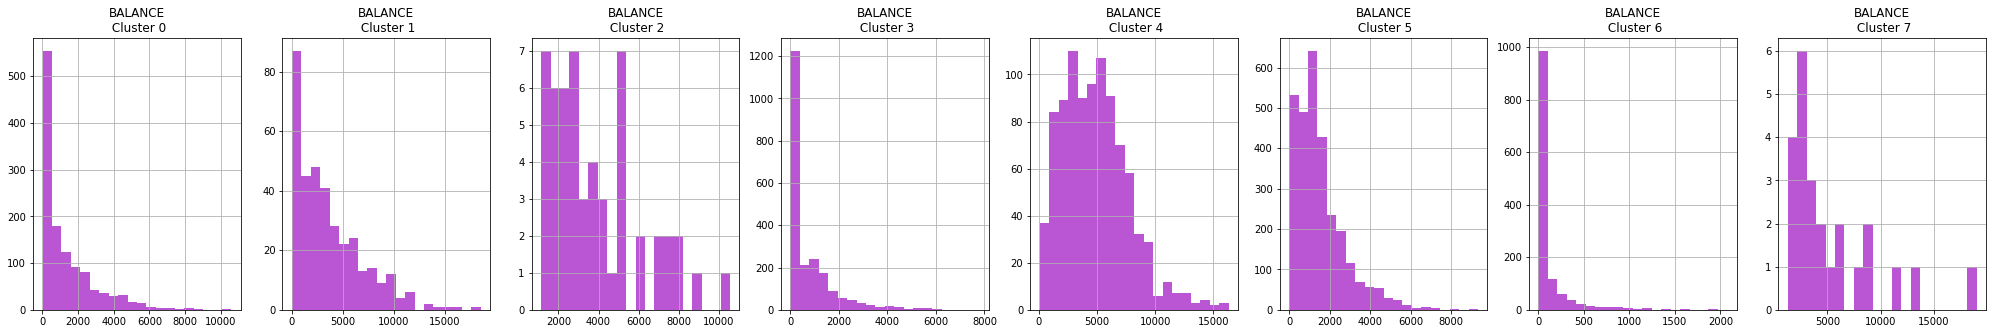

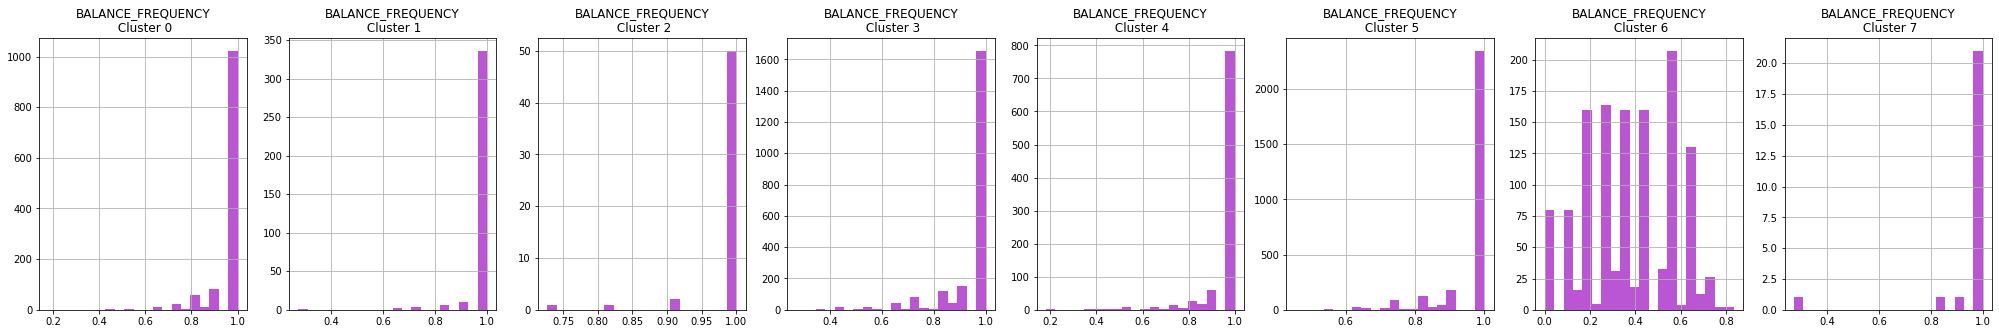

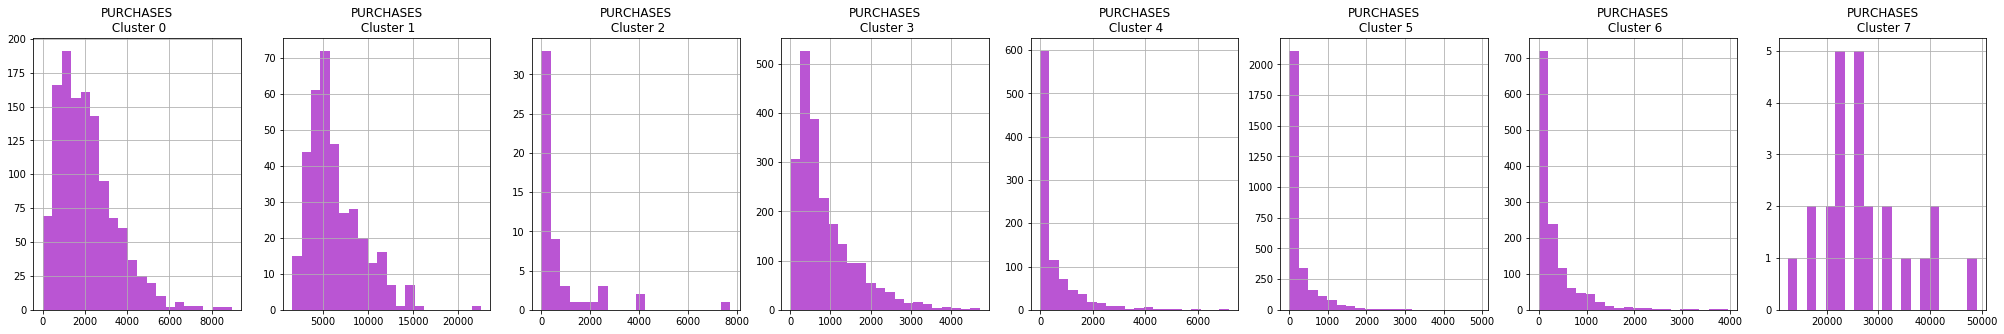

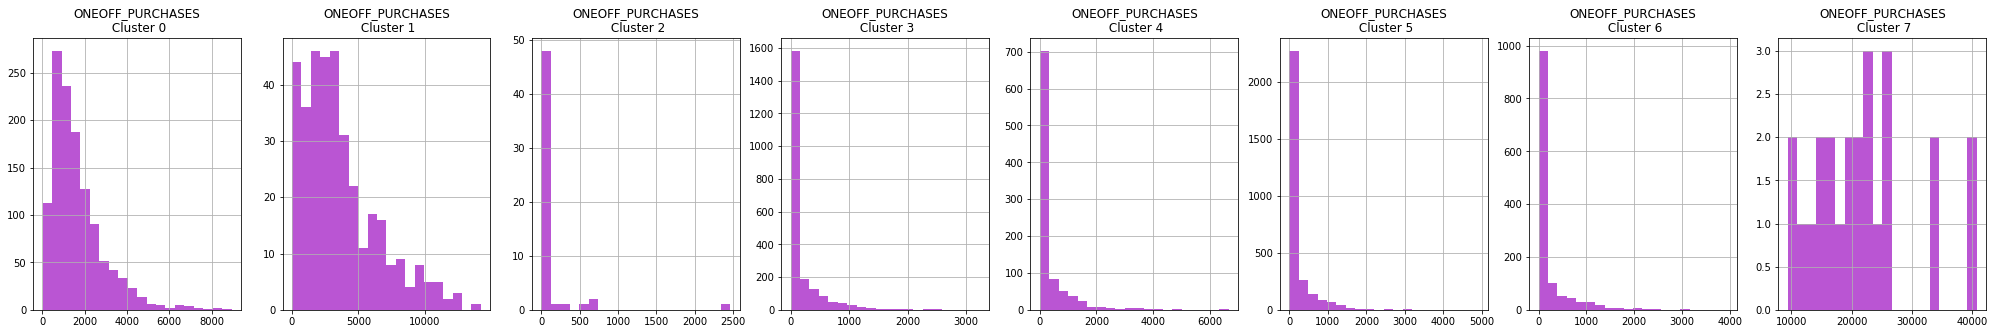

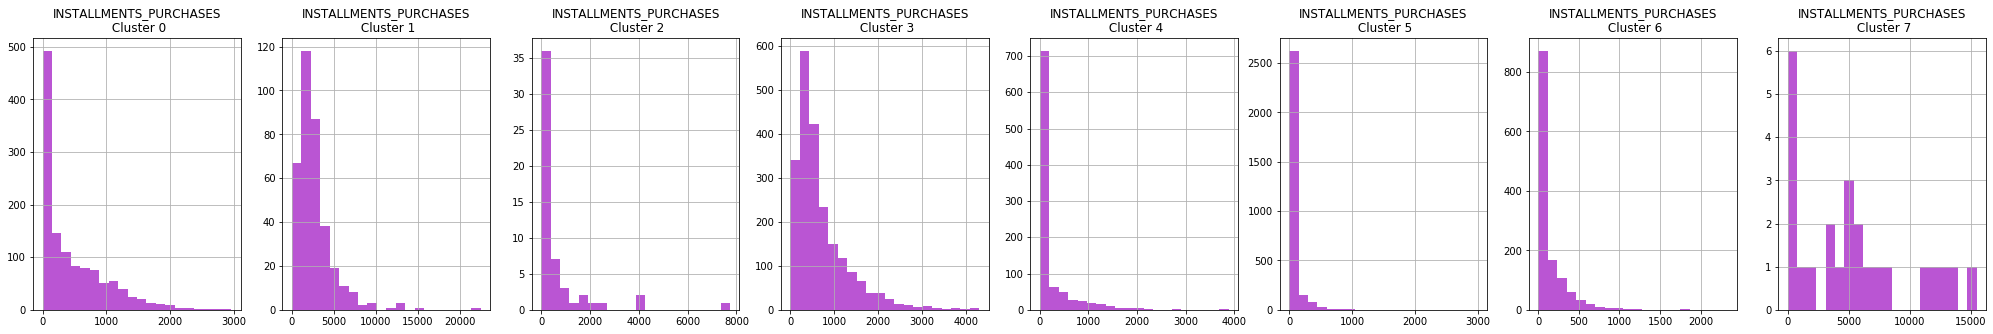

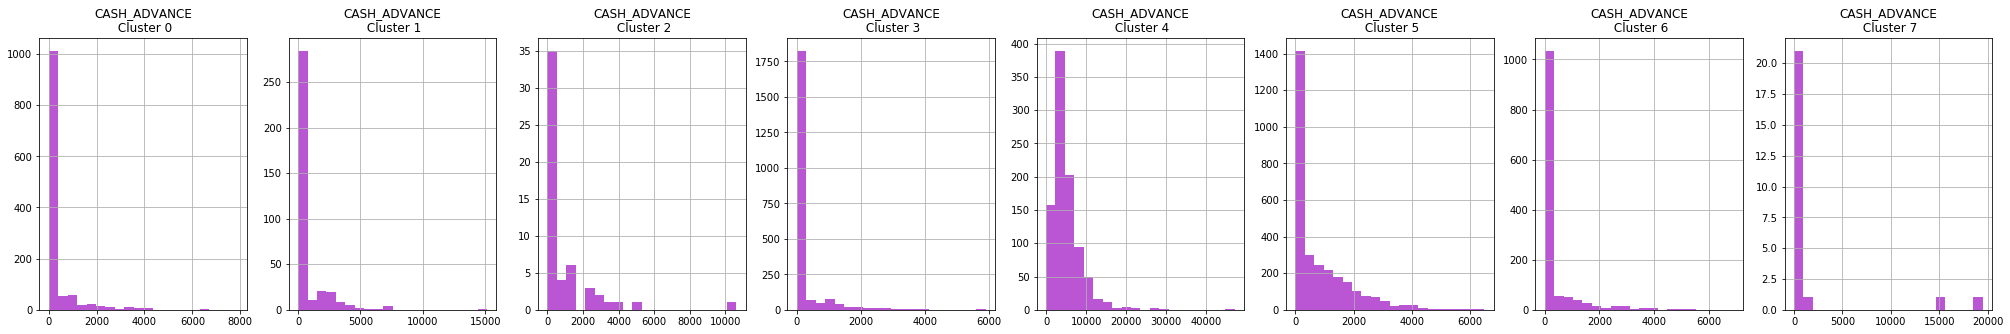

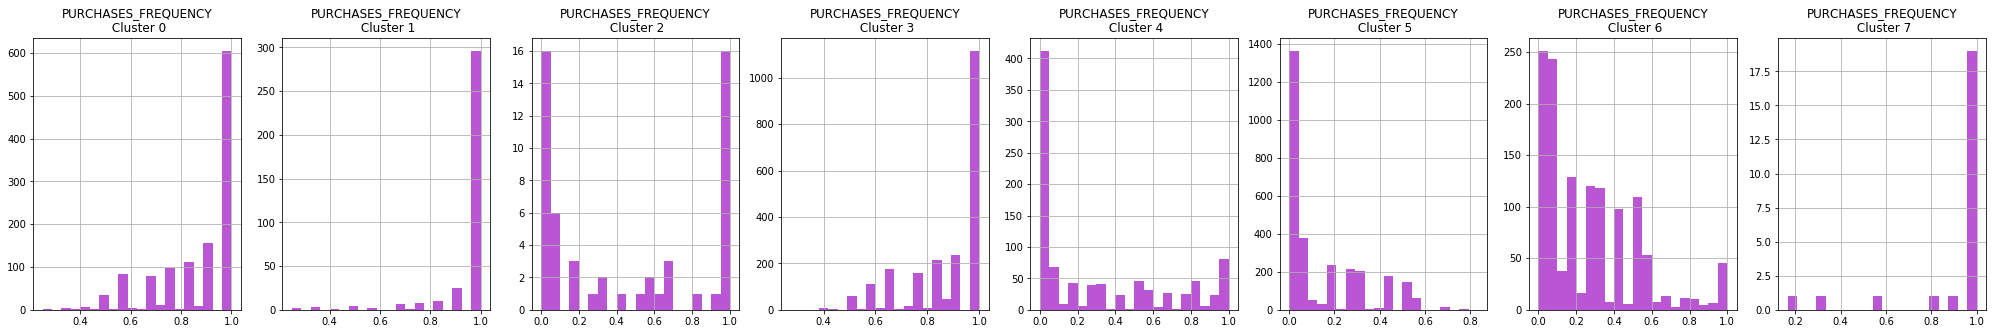

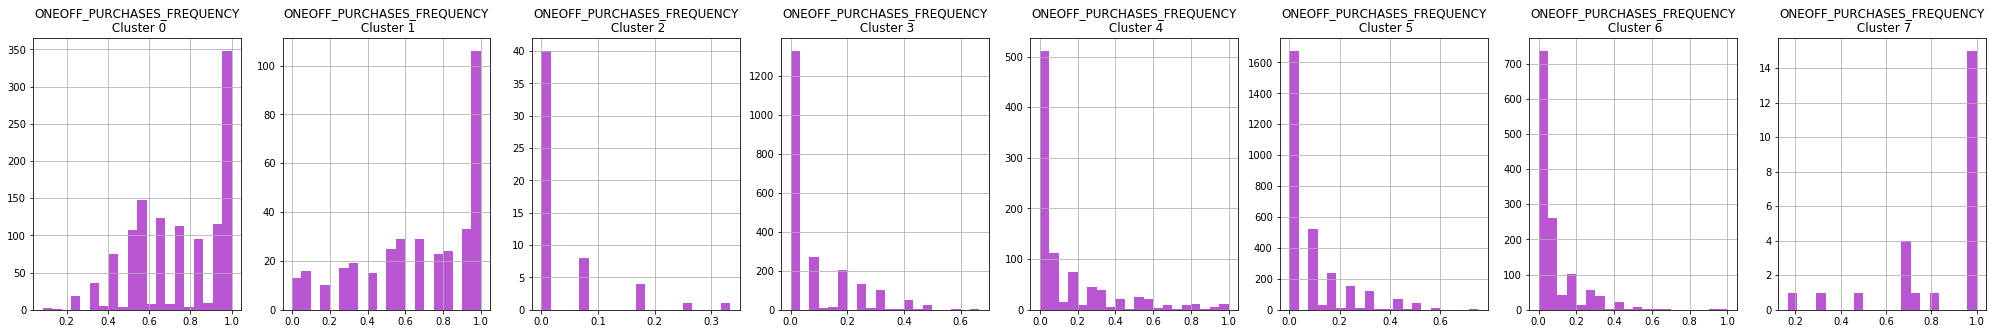

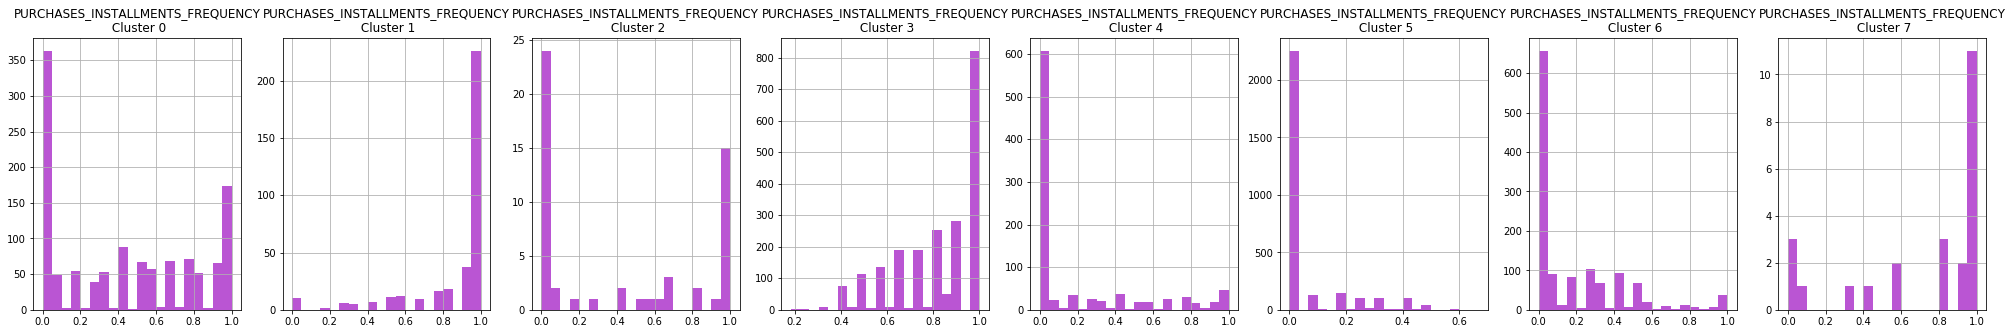

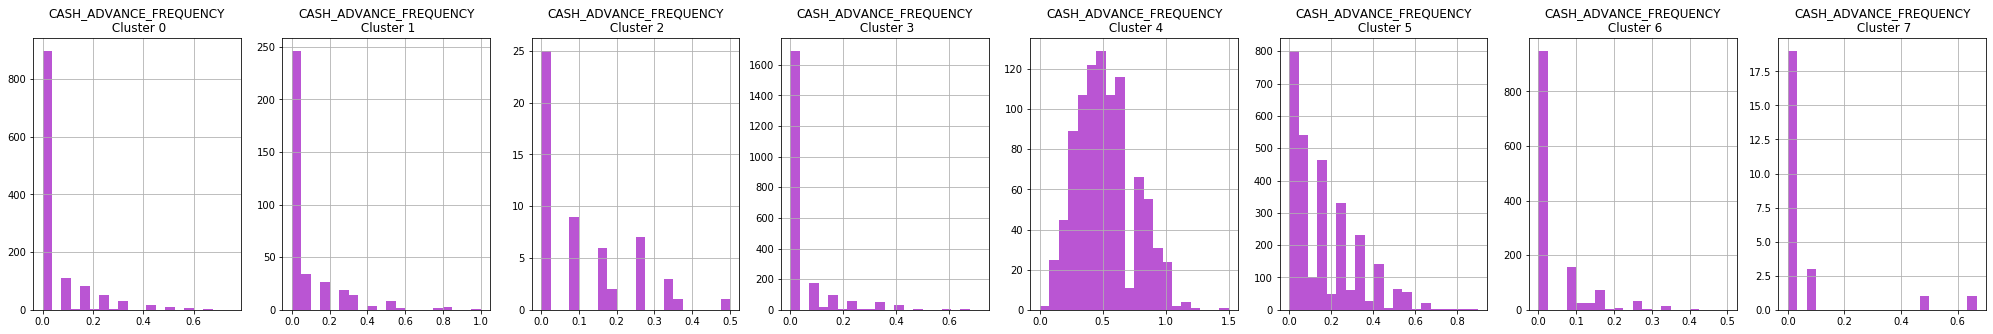

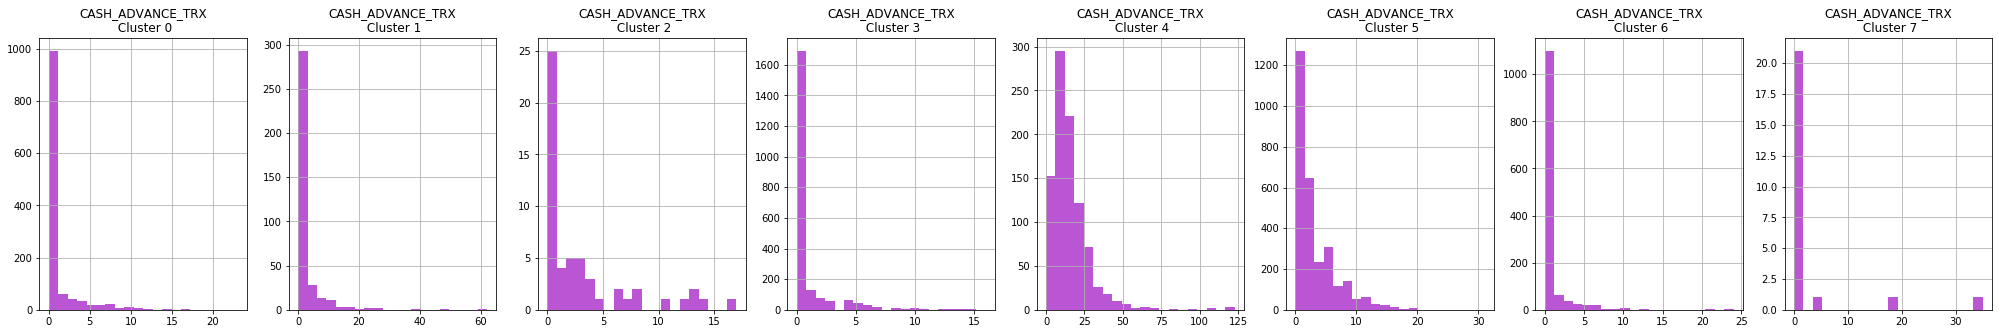

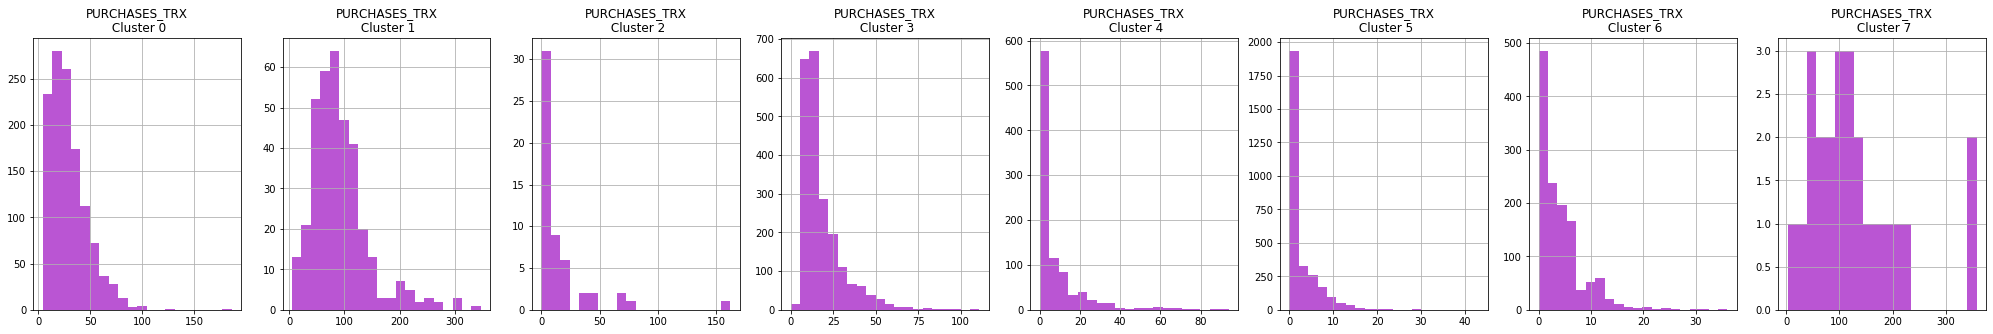

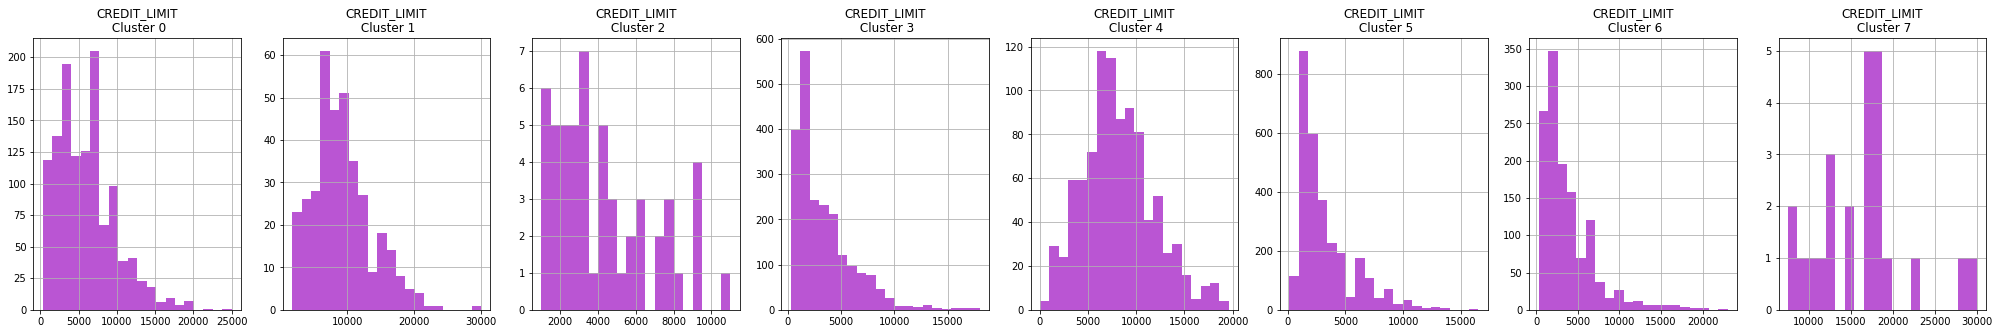

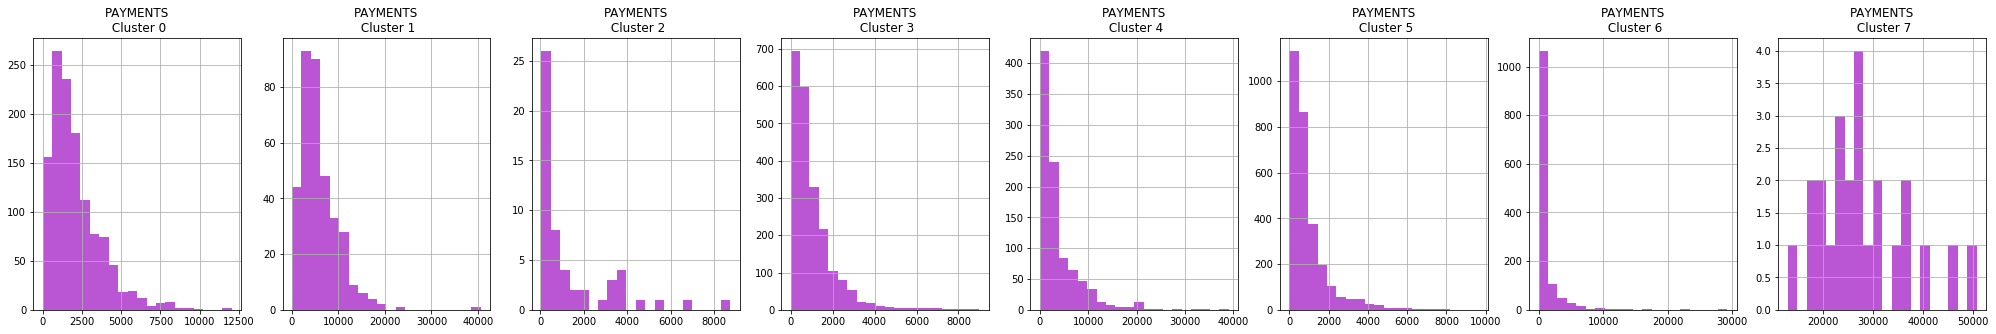

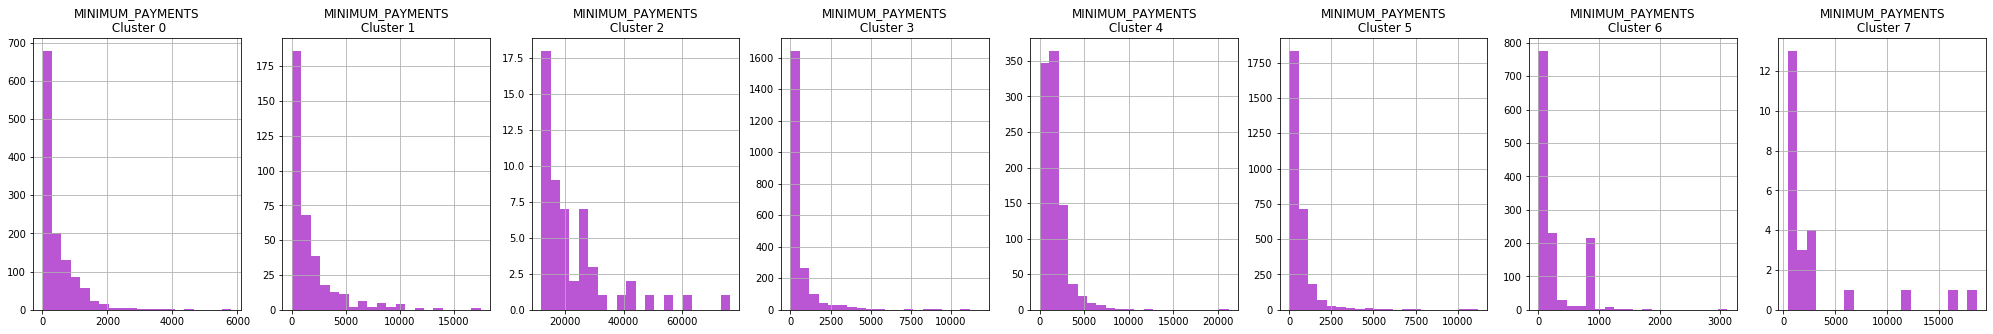

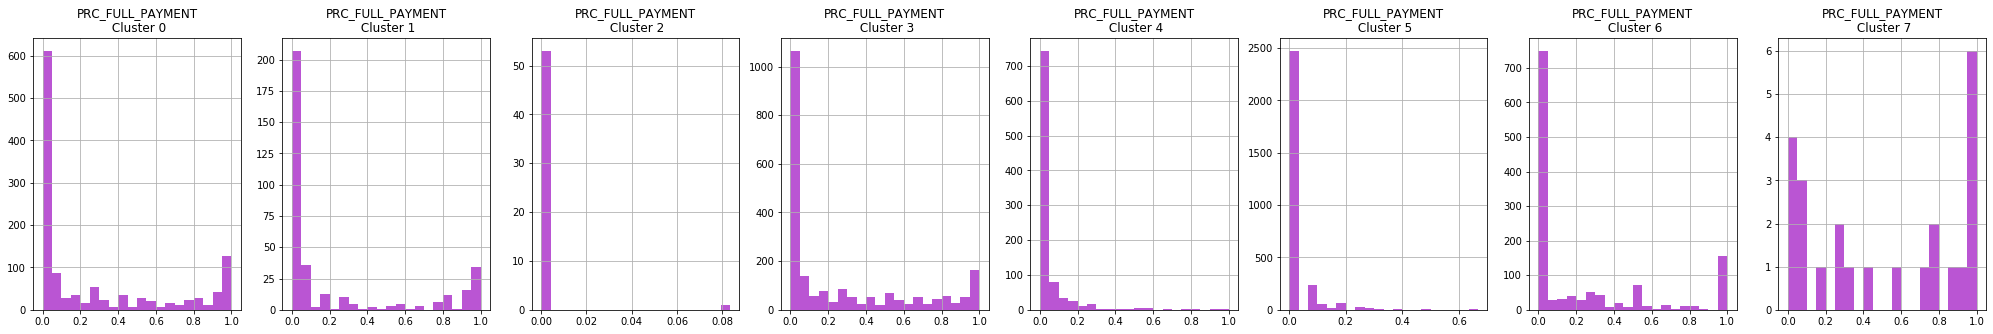

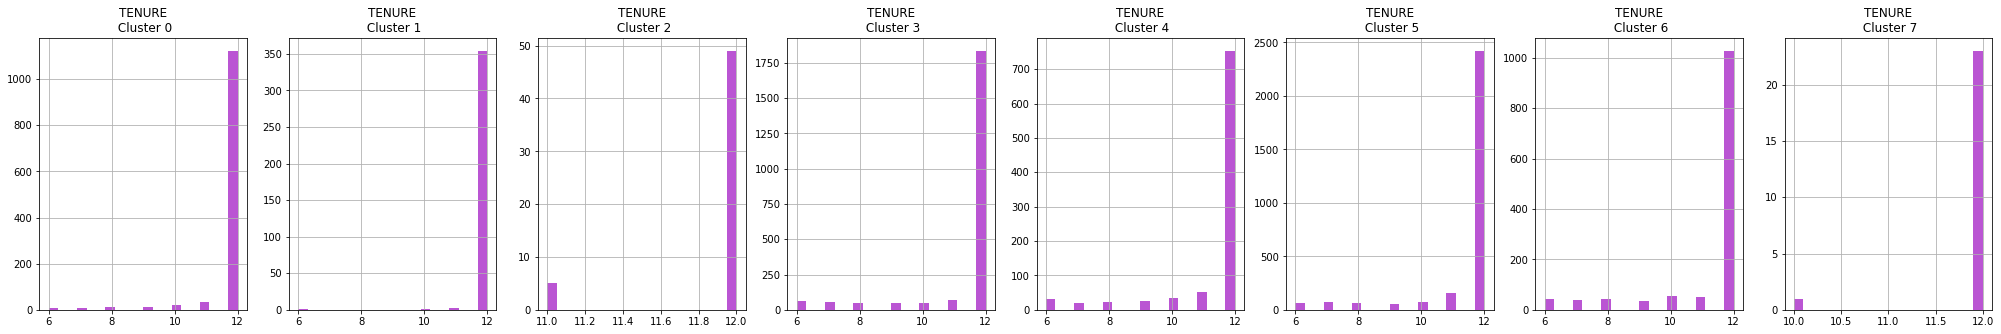

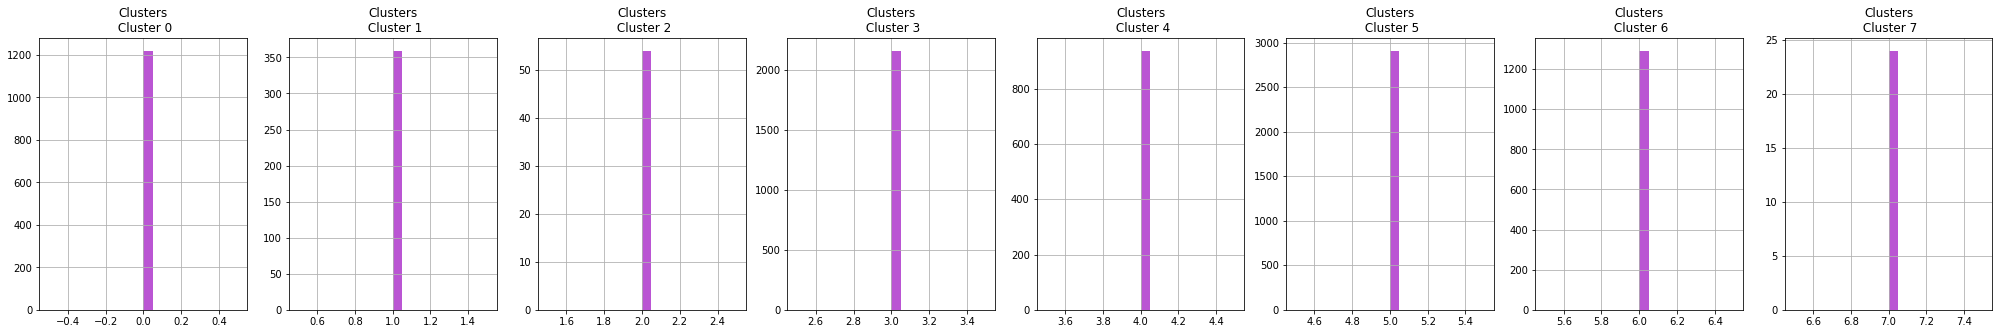

In [35]:
for i in df.columns:
    plt.figure(figsize=(35,5))
    for j in range(8):
        plt.subplot(1,8, j+1)
        cluster = df[df['Clusters'] == j]
        cluster[i].hist(bins=20, color = 'mediumorchid')
        plt.title('{}\n Cluster {}'.format(i,j))

### Applying Principal Component Analysis

In [36]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.6822201 , -1.07645279],
       [-1.13829556,  2.50647066],
       [ 0.96968419, -0.38352056],
       ...,
       [-0.92620313, -1.81078563],
       [-2.33655134, -0.65796407],
       [-0.55642261, -0.40046158]])

In [37]:
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df

,pca1,pca2
0,-1.682220,-1.076453
1,-1.138296,2.506471
2,0.969684,-0.383521
3,-0.873628,0.043162
4,-1.599434,-0.688582
...,...,...
8945,-0.359629,-2.016145
8946,-0.564368,-1.639123
8947,-0.926203,-1.810786
8948,-2.336551,-0.657964


In [38]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.682220,-1.076453,5
1,-1.138296,2.506471,4
2,0.969684,-0.383521,0
3,-0.873628,0.043162,5
4,-1.599434,-0.688582,5
...,...,...,...
8945,-0.359629,-2.016145,3
8946,-0.564368,-1.639123,3
8947,-0.926203,-1.810786,3
8948,-2.336551,-0.657964,5


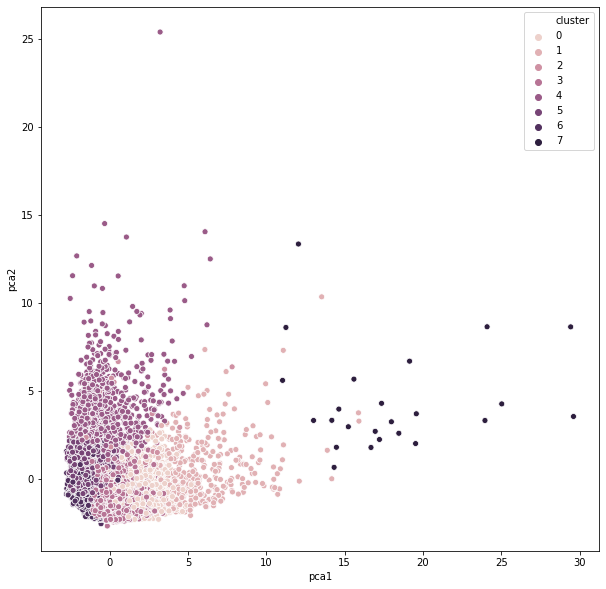

In [39]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y='pca2', hue = 'cluster', data = pca_df, palette = sns.cubehelix_palette(8))

### Applying Auto Encoders

In [55]:
encoding_dim = 7

input_df = Input(shape=(17,))

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [56]:
df_scaled.shape

(8950, 17)

In [58]:
autoencoder.fit(df_scaled,df_scaled, batch_size =128, epochs = 30, verbose = 1)

Epoch 1/30
8950/8950 [==============================] - 5s 545us/sample - loss: 0.0807
Epoch 2/30
8950/8950 [==============================] - 5s 533us/sample - loss: 0.0827
Epoch 3/30
8950/8950 [==============================] - 5s 547us/sample - loss: 0.0767
Epoch 4/30
8950/8950 [==============================] - 5s 581us/sample - loss: 0.0764
Epoch 5/30
8950/8950 [==============================] - 7s 733us/sample - loss: 0.0789
Epoch 6/30
8950/8950 [==============================] - 7s 808us/sample - loss: 0.0767
Epoch 7/30
8950/8950 [==============================] - 5s 600us/sample - loss: 0.0725
Epoch 8/30
8950/8950 [==============================] - 5s 608us/sample - loss: 0.0829
Epoch 9/30
8950/8950 [==============================] - 5s 613us/sample - loss: 0.0777
Epoch 10/30
8950/8950 [==============================] - 6s 648us/sample - loss: 0.0692
Epoch 11/30
8950/8950 [==============================] - 7s 796us/sample - loss: 0.0667
Epoch 12/30
8950/8950 [==================

In [59]:
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense_16 (Dense)             (None, 7)                 126       
_________________________________________________________________
dense_17 (Dense)             (None, 500)               4000      
_________________________________________________________________
dense_18 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_19 (Dense)             (None, 2000)              1002000   
_________________________________________________________________
dense_20 (Dense)             (None, 10)                20010     
_________________________________________________________________
dense_21 (Dense)             (None, 2000)              2200

In [60]:
prediction = encoder.predict(df_scaled)

In [61]:
prediction.shape

(8950, 10)

In [62]:
score_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(prediction)
    score_2.append(kmeans.inertia_)

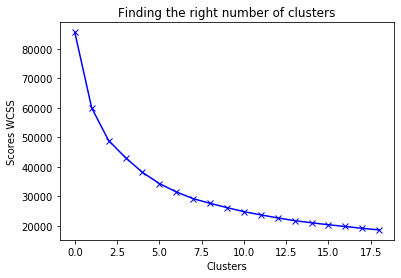

In [63]:
plt.plot(score_2, 'bx-')
plt.title('Finding the right number of clusters')
plt.ylabel('Scores WCSS')
plt.xlabel('Clusters')
plt.show()

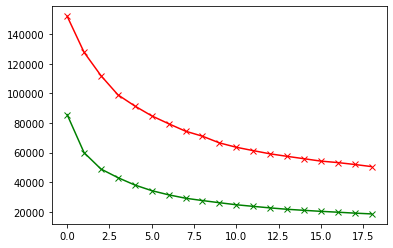

In [64]:
plt.plot(score_1, 'bx-', color = 'r')
plt.plot(score_2, 'bx-', color = 'g')


In [65]:
kmeans = KMeans(4)
kmeans.fit(prediction)
labels = kmeans.labels_
df['Clusters'] = labels

In [66]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Clusters
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,1


In [67]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(prediction)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])

In [68]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.921072,-0.265595,0
1,1.139792,-2.215592,1
2,0.086599,1.077143,0
3,1.597425,-0.893508,1
4,-1.769115,-0.212616,0
...,...,...,...
8945,-0.424192,-0.114966,0
8946,-0.374858,-0.366691,0
8947,-0.260303,-0.496006,0
8948,1.127208,-1.655487,1


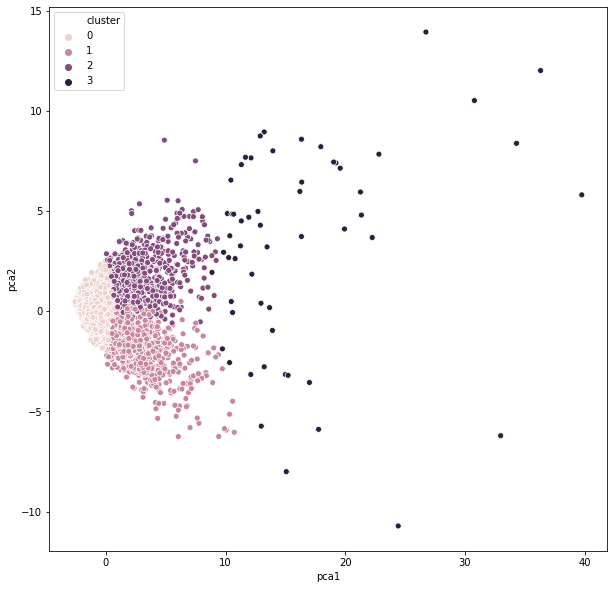

In [69]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x = 'pca1', y='pca2', hue = 'cluster', data = pca_df, palette = sns.cubehelix_palette(4))